In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import torch
torch.cuda.set_device(0)
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)

from Utils import *

In [3]:
import sys
sys.path.insert(0, 'preprocess/')
import vectorizer

import pickle

In [4]:
vec = pickle.load(open('preprocess/20News/vec_sports.p', 'rb'))
add_frequencies(vec, vec.seq_text['train'])

In [5]:
import model.Attn_Word_Pert as M
Model = M.Model

In [6]:
X, Xt = vec.seq_text['train'], vec.seq_text['test']
y, yt = vec.label['train'], vec.label['test']

In [7]:
X, y = filterbylength(X, y, min_length=6, max_length=500)
Xt, yt = filterbylength(Xt, yt, min_length=6, max_length=500)

Xt, yt = sortbylength(Xt, yt)

In [8]:
pos_weight = len(y)/sum(y) - 1

In [9]:
from sklearn.metrics import classification_report, f1_score

def train(name='') :
    model = Model(vec.vocab_size, vec.word_dim, 64, dirname='20News_sports', hidden_size=128, pre_embed=vec.embeddings)
    best_f1 = 0.0
    for i in tqdm_notebook(range(10)) :
        loss = model.train(X, y)
        o, he = model.evaluate(Xt)
        o = np.array(o)
        rep = classification_report(yt, (o > 0.5))
        f1 = f1_score(yt, (o > 0.5), pos_label=1)
        print(rep)
        stmt = '%s, %s' % (i, loss)
        if f1 > best_f1 and i > 2:
            best_f1 = f1
            dirname = model.save_values(add_name=name, save_model=True)
            print("Model Saved", f1)
        else :
            dirname = model.save_values(add_name=name, save_model=False)
            print("Model not saved", f1)
        f = open(dirname + '/epoch.txt', 'a')
        f.write(stmt + '\n')
        f.write(rep + '\n')
        f.close()
    
    return model

In [10]:
train(name='first_final_sports')

Setting Embedding


              precision    recall  f1-score   support

           0       0.82      0.92      0.87       171
           1       0.91      0.81      0.86       183

   micro avg       0.86      0.86      0.86       354
   macro avg       0.87      0.87      0.86       354
weighted avg       0.87      0.86      0.86       354

Model not saved 0.8612716763005781


              precision    recall  f1-score   support

           0       0.77      1.00      0.87       171
           1       1.00      0.72      0.84       183

   micro avg       0.86      0.86      0.86       354
   macro avg       0.89      0.86      0.85       354
weighted avg       0.89      0.86      0.85       354

Model not saved 0.8380952380952381


              precision    recall  f1-score   support

           0       0.84      0.98      0.91       171
           1       0.98      0.83      0.90       183

   micro avg       0.90      0.90      0.90       354
   macro avg       0.91      0.91      0.90       354
weighted avg       0.91      0.90      0.90       354

Model not saved 0.8994082840236687


              precision    recall  f1-score   support

           0       0.87      0.98      0.92       171
           1       0.98      0.86      0.92       183

   micro avg       0.92      0.92      0.92       354
   macro avg       0.92      0.92      0.92       354
weighted avg       0.93      0.92      0.92       354

Model Saved 0.9154518950437316


              precision    recall  f1-score   support

           0       0.89      0.96      0.93       171
           1       0.96      0.89      0.93       183

   micro avg       0.93      0.93      0.93       354
   macro avg       0.93      0.93      0.93       354
weighted avg       0.93      0.93      0.93       354

Model Saved 0.9261363636363636


              precision    recall  f1-score   support

           0       0.92      0.87      0.89       171
           1       0.89      0.93      0.91       183

   micro avg       0.90      0.90      0.90       354
   macro avg       0.90      0.90      0.90       354
weighted avg       0.90      0.90      0.90       354

Model not saved 0.9066666666666667


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       171
           1       0.97      0.89      0.93       183

   micro avg       0.93      0.93      0.93       354
   macro avg       0.93      0.93      0.93       354
weighted avg       0.93      0.93      0.93       354

Model not saved 0.9257142857142857


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       171
           1       0.96      0.90      0.93       183

   micro avg       0.93      0.93      0.93       354
   macro avg       0.93      0.93      0.93       354
weighted avg       0.93      0.93      0.93       354

Model Saved 0.9295774647887324


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       171
           1       0.97      0.91      0.94       183

   micro avg       0.94      0.94      0.94       354
   macro avg       0.94      0.94      0.94       354
weighted avg       0.94      0.94      0.94       354

Model Saved 0.9378531073446328


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       171
           1       0.96      0.90      0.93       183

   micro avg       0.93      0.93      0.93       354
   macro avg       0.93      0.93      0.93       354
weighted avg       0.93      0.93      0.93       354

Model not saved 0.9295774647887324



# **EVALUATION**

In [11]:
domain = 'sports'
def load_model(dirname) :
    model = Model(vec.vocab_size, vec.word_dim, 64, dirname='20News_'+domain, hidden_size=128, pre_embed=vec.embeddings)
    model.dirname = dirname
    model.load_values(dirname)
    return model

In [12]:
model = load_model('outputs/attn_word_20News_sports/SatOct2011:46:412018_first_final_sports/')

Setting Embedding


In [13]:
yt_hat, attn_hat = evaluate_and_print(model, Xt, yt)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       171
           1       0.97      0.91      0.94       183

   micro avg       0.94      0.94      0.94       354
   macro avg       0.94      0.94      0.94       354
weighted avg       0.94      0.94      0.94       354



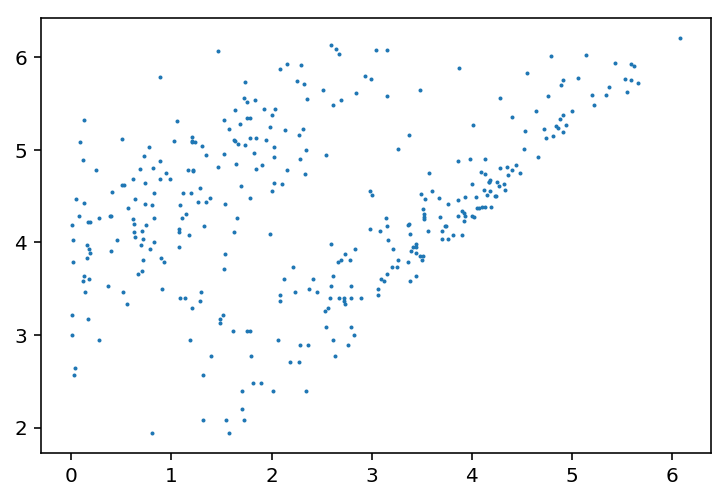

In [14]:
plot_entropy(Xt, attn_hat)

# __Sampling__

In [15]:
model.vec = vec
sampled_output = model.sampling_top(Xt, sample_vocab=100, topnum=5)

In [16]:
import pickle
pickle.dump(sampled_output, open(model.dirname + '/sampled.p', 'wb'))

In [17]:
sampled_output = pickle.load(open(model.dirname + '/sampled.p', 'rb'))

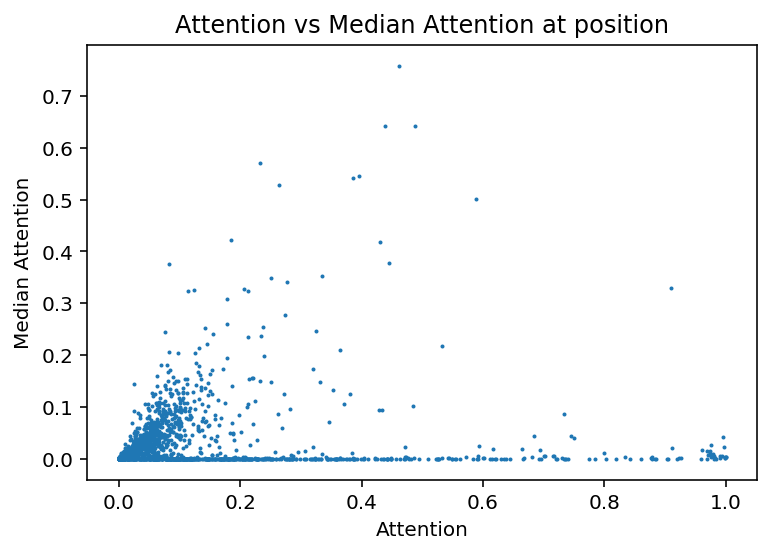

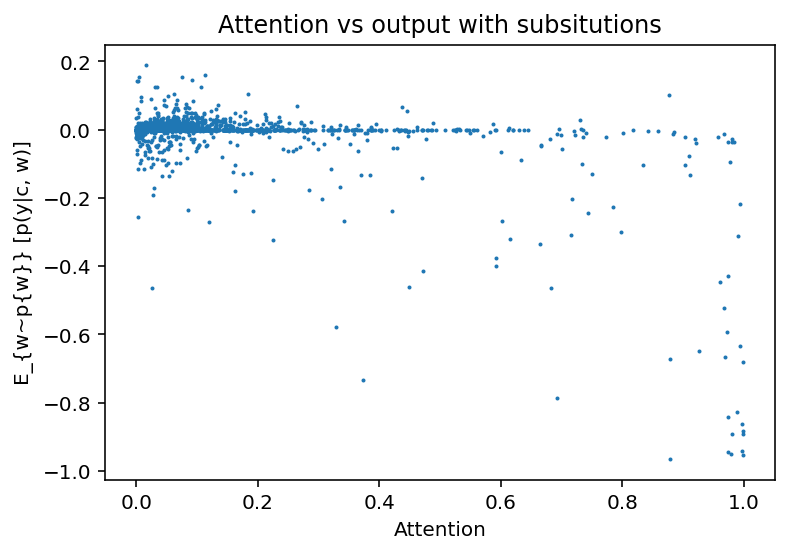

In [18]:
generate_medians_from_sampling_top(sampled_output, attn_hat, yt_hat, dirname=model.dirname)

In [19]:
distractors = get_distractors(sampled_output, attn_hat)
print_few_distractors(vec, Xt, attn_hat, sampled_output, distractors)

0.9900990099009901 1 101


--------------------


****************************************


**Gradients**
=============

In [21]:
grads = model.gradient_mem(Xt)
process_grads(grads)

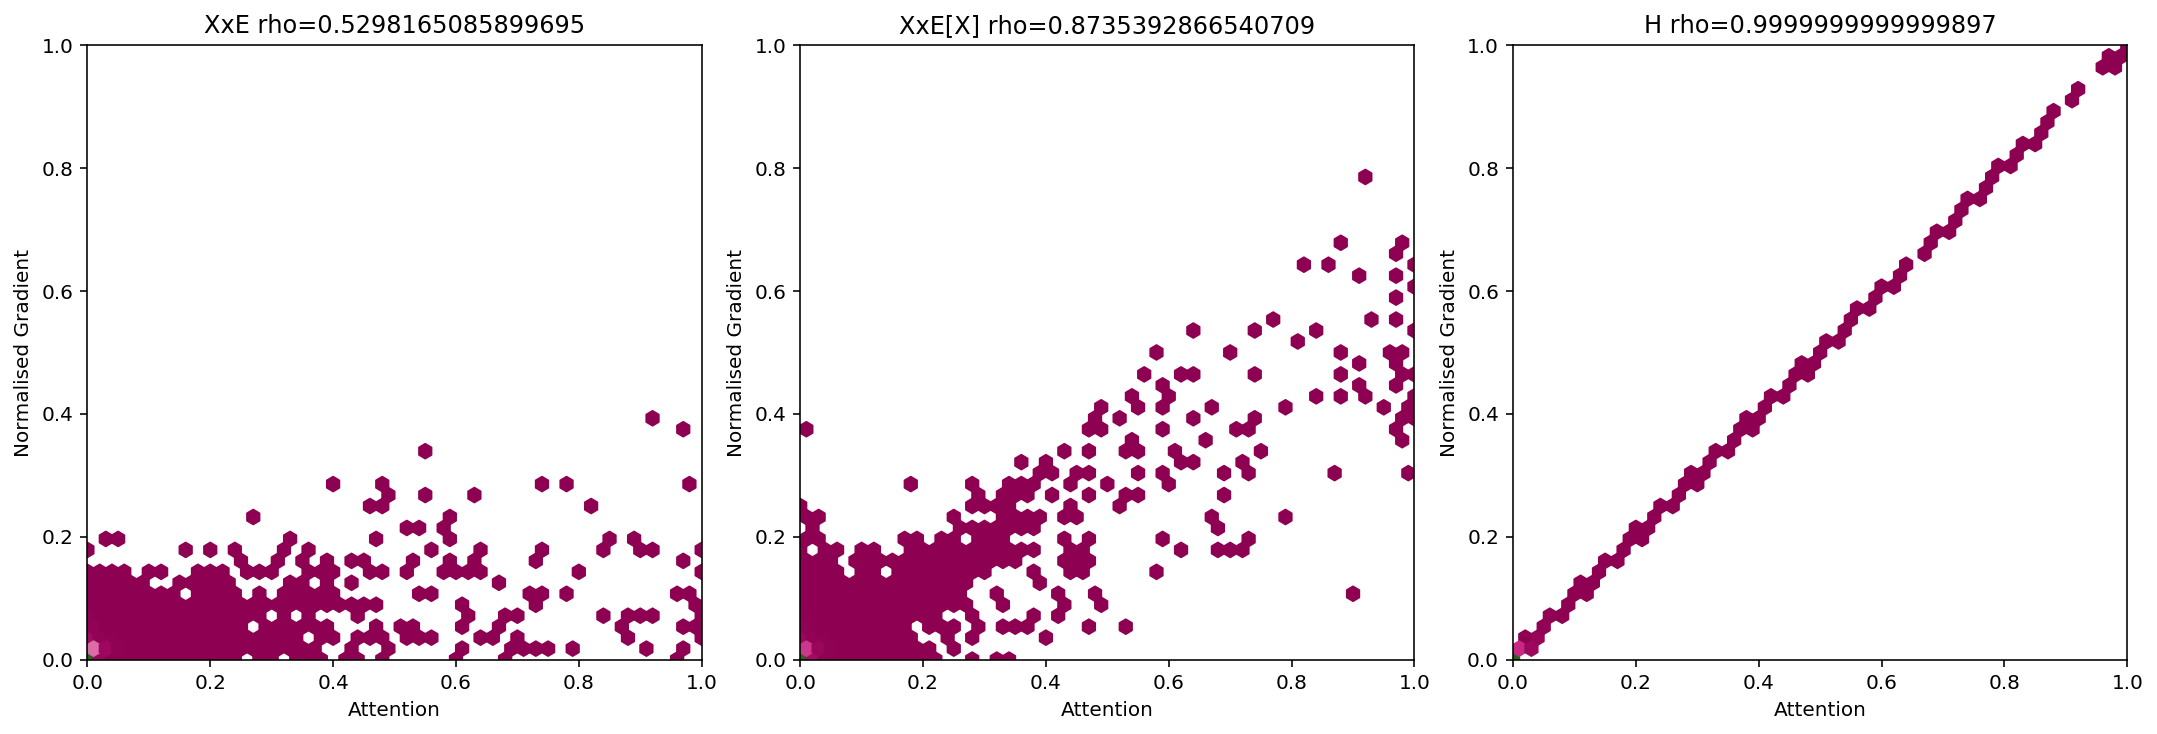

In [22]:
plot_grads(Xt, attn_hat, grads, dirname=model.dirname)

**Permutation**
===========

In [23]:
perms = model.permute_attn(Xt)

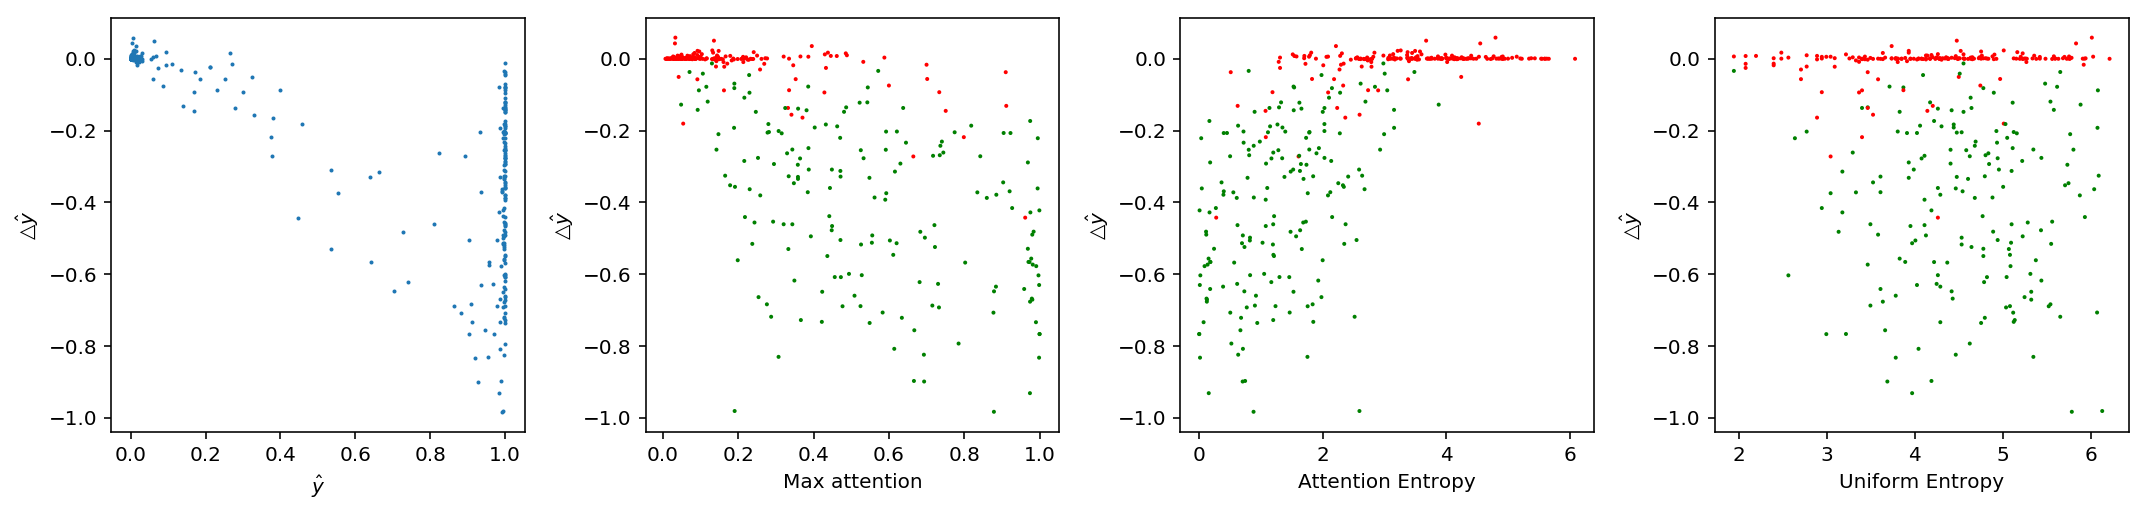

In [24]:
plot_permutations(perms, Xt, yt_hat, attn_hat, dirname=model.dirname)

**Adversarial Attention**
=========================

In [25]:
adversarial_outputs = model.adversarial(Xt, _type='uniform')
ad_y, ad_attn = adversarial_outputs

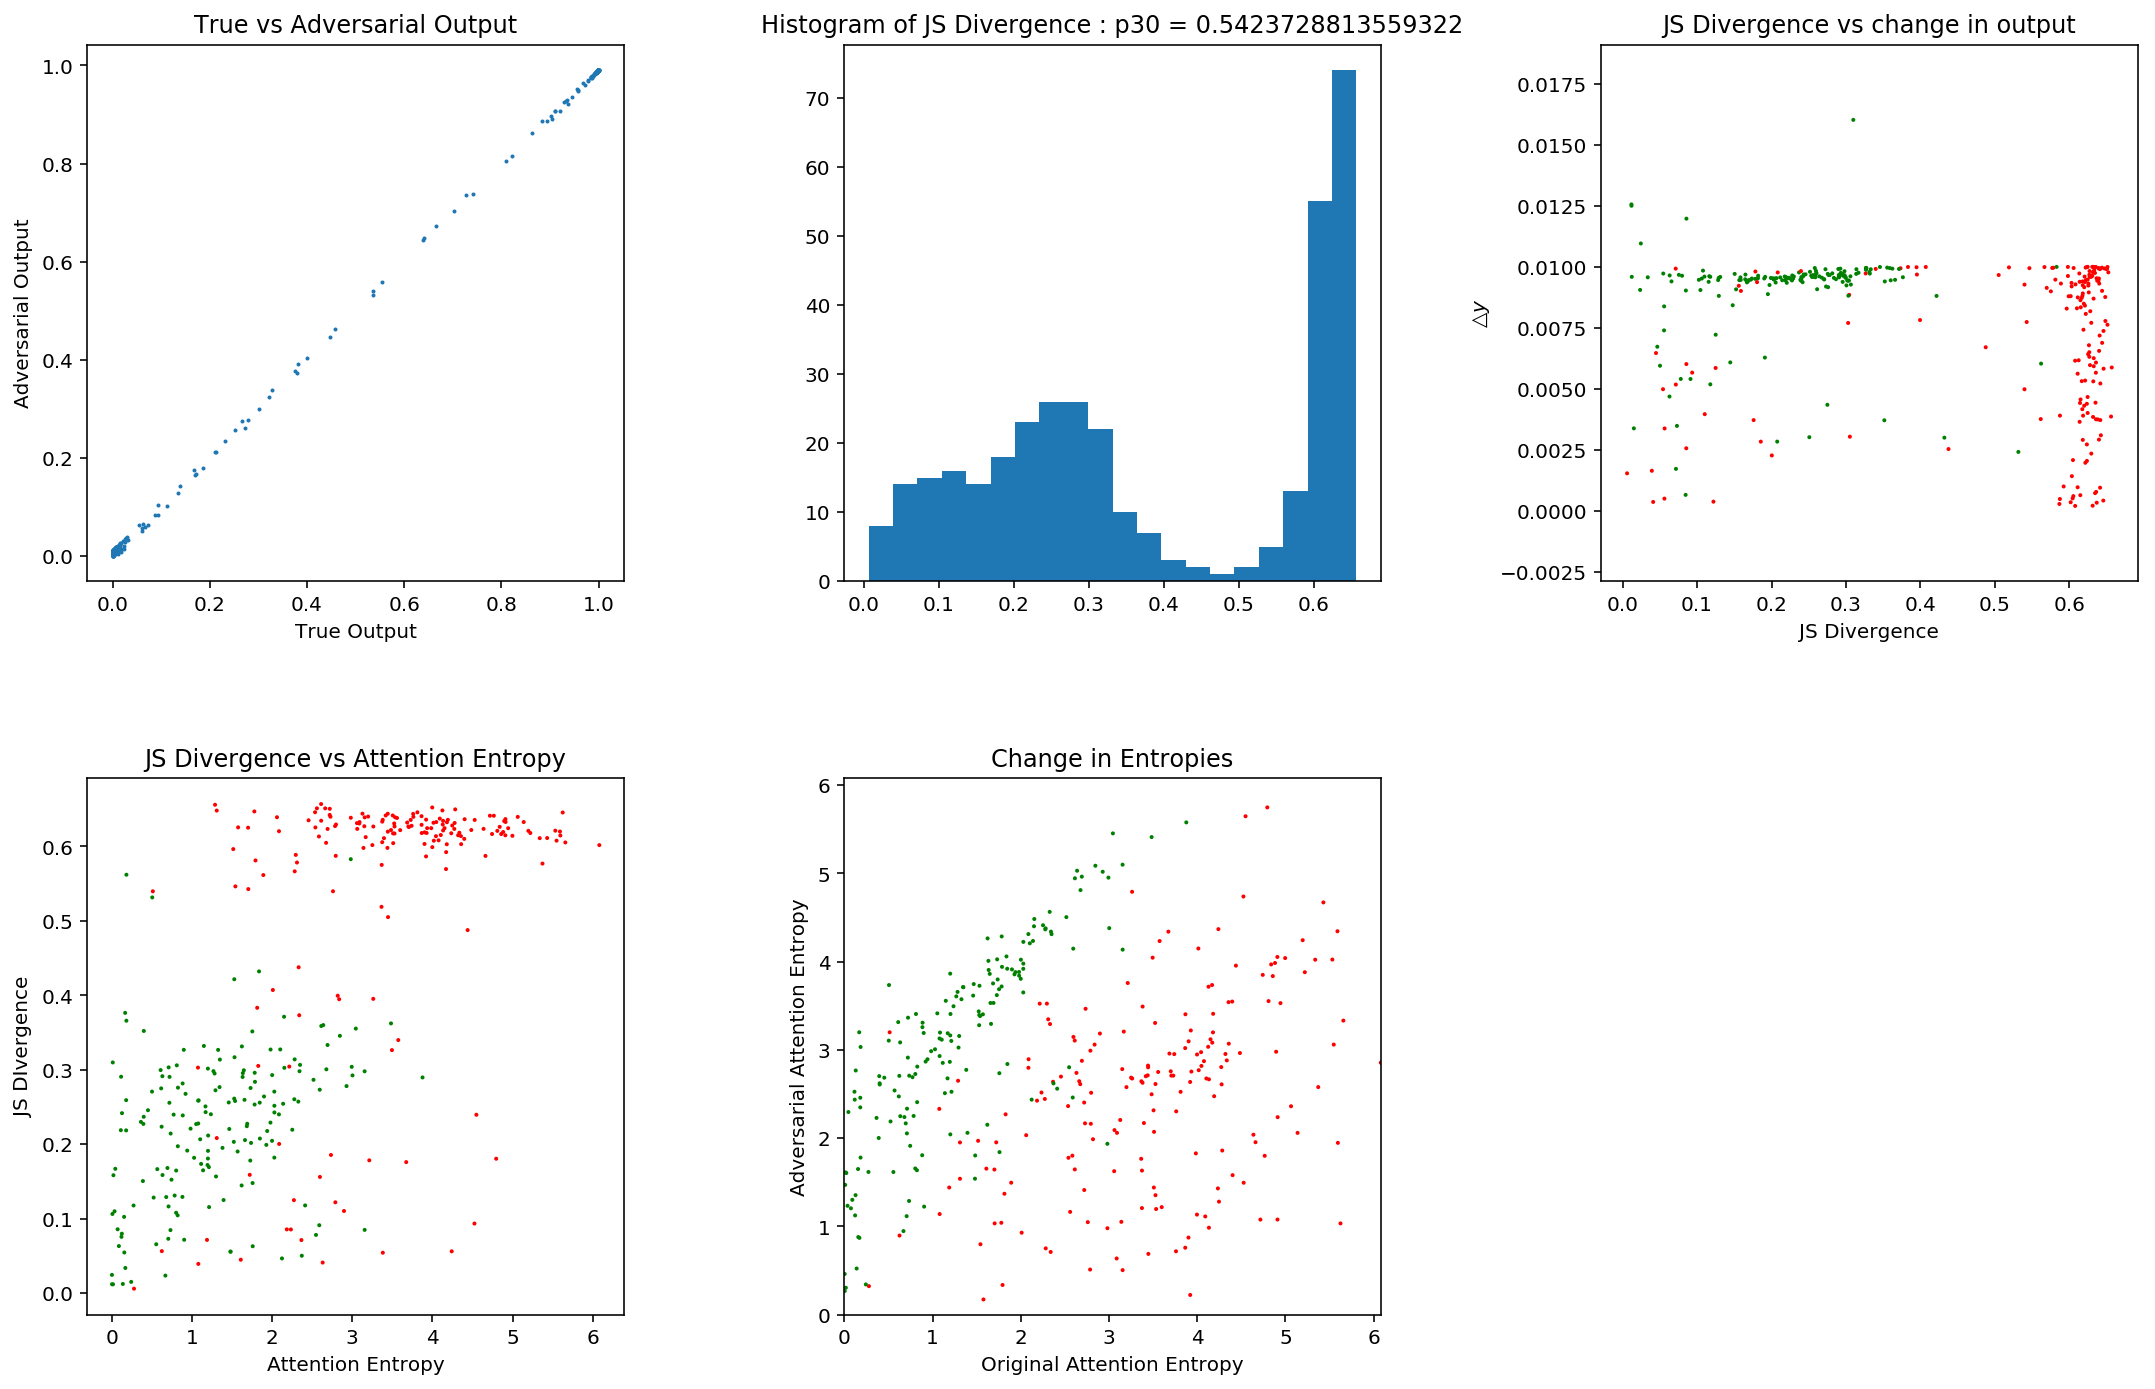

In [26]:
jds = plot_adversarial(Xt, yt_hat, attn_hat, adversarial_outputs, dirname=model.dirname)

In [27]:
idx = list(np.where(np.logical_and(np.array(jds) > 0.5, yt_hat > 0.7))[0])[:30]
idx

[201, 274]

In [28]:
n = 113
print_adversarial_example(vec.map2words(X[n]), attn_hat[n], ad_attn[n])
print(yt_hat[n], ad_y[n])

--------------------


0.97791904 [0.9688723]


**Zero Runs** -- p(y|x, c) - p(y|x)
=============

In [29]:
zero_runs = model.zero_H_run(Xt)

In [30]:
zero_outputs, zero_H_diff = zero_runs

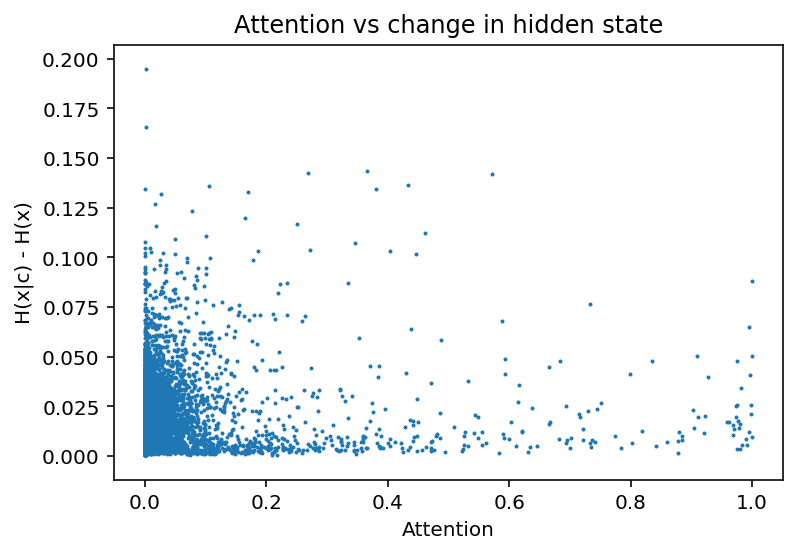

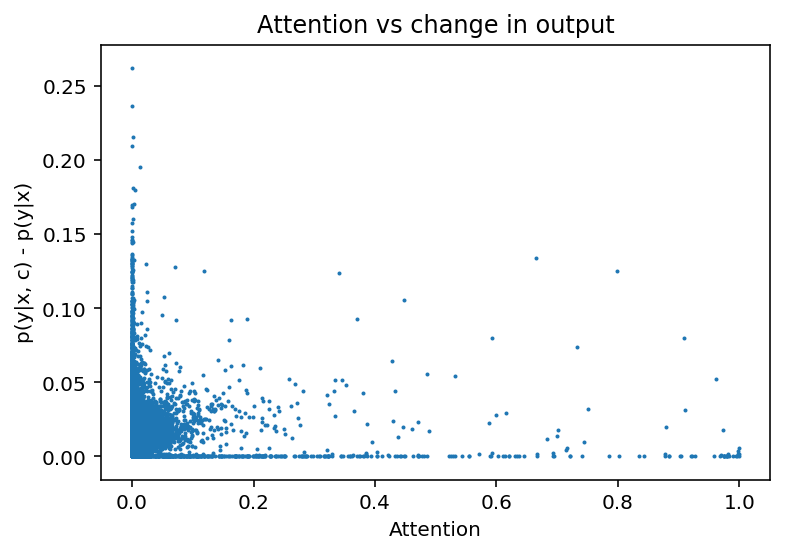

In [31]:
plot_attn_diff(Xt, attn_hat, zero_H_diff, xlabel='Attention', ylabel="H(x|c) - H(x)", 
               title="Attention vs change in hidden state", save_name="hxc-hx.pdf", dirname=model.dirname)
plot_y_diff(X, attn_hat, yt_hat, zero_outputs, xlabel="Attention", ylabel="p(y|x, c) - p(y|x)", 
            title="Attention vs change in output", save_name="pyxc-pyx.pdf", dirname=model.dirname)

**Remove and Run** -- p(y|x, c) - p(y|c)
==================

In [32]:
remove_outputs = model.remove_and_run(Xt)

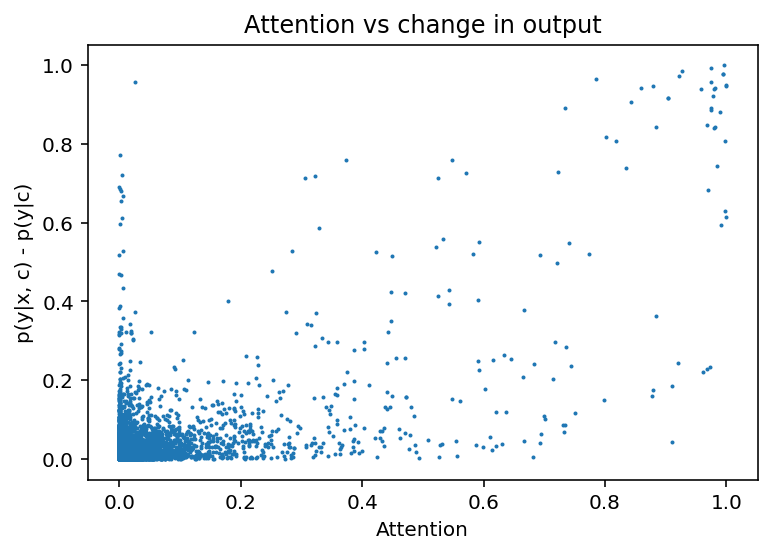

In [33]:
plot_y_diff(Xt, attn_hat, yt_hat, remove_outputs, xlabel="Attention", ylabel="p(y|x, c) - p(y|c)", 
            title="Attention vs change in output", save_name="pyxc-pyc.pdf", dirname=model.dirname)

**Perturbation**
================

In [34]:
perturb_outputs = model.perturbation_embedding(Xt)

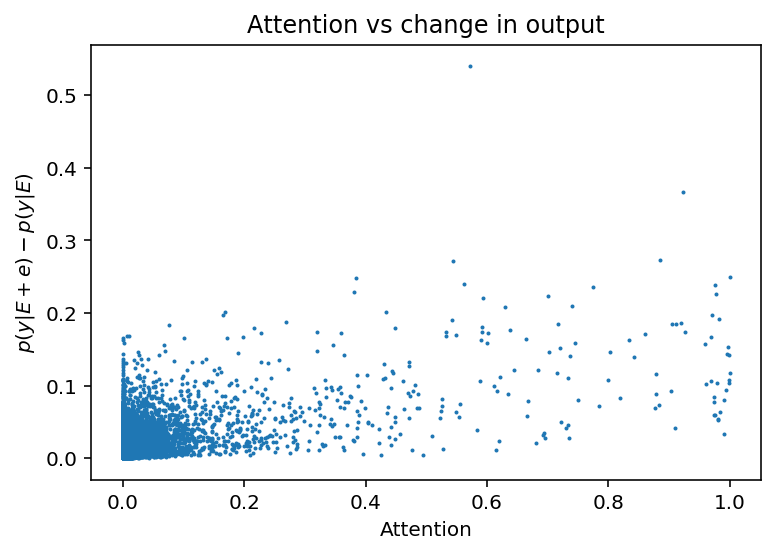

In [35]:
plot_pertub_embedding(Xt, attn_hat, yt_hat, perturb_outputs, dirname=model.dirname)